# BUSA8001 Programming Task 2  

**Assignment Points**: 100    
**Due Date**: Friday of Week 11 (18 October 2024) at 11:59pm   




---

## About This Assignment
Customer segmentation is the process of dividing customers into groups based on common characteristics so companies can market to each group effectively and appropriately. It can be employed by all types of business, regardless of size, industry and whether they sell online or in person. For example, a small business selling guitars might decide to promote lower-priced products to younger guitarists and higher-priced premium guitars to older musicians based on segment knowledge which tells them that younger musicians have less disposable income than their older counterparts.  

<hr style="width:35%;margin-left:0;"> 

## Task

You are employed by a large travel agency to perform customer segmentation analysis. You are provided with a dataset of 2,000 customers collected through their bookings and interactions with the agency. The dataset includes variables such as customer age, gender, annual income, etc.

Your task is to analyse the data in Python using relevant techniques covered in lectures and identify distinct customer segments within the dataset. You will then compile your results into tables and diagrams and writeup a report of up to **1,000 words** (excluding tables and figures). Ensure your report is informative, intuitive, and easily understandable for management, who may not have a technical background.

Your report should address the questions listed below under the following headings:

1. **Word count** (if missing -5 marks)
    - Include the word count of your report 
2. **Introduction** (10 marks)
    - Describe the problem, explain what you aim to achieve by solving it, outline the approach you will take to address it, and specify the data you will use
3. **Exploratory Data Analysis** (20 marks)
    - Perform basic exploratory data analysis, present and comment on key summary statistics, etc.
    - Provide charts (e.g. histograms, pie charts) where appropriate
4. **Customer Segmentation** (40 marks)
    - Standardise the two numeric variables using StandardScaler
    - Choose the optimal number of customer segments/clusters using the Elbow Method and three appropriately chosen Silhouette Plots
    - After identifying the optimal number of clusters, estimate the clusters using both the K-means++ and Agglomerative Clustering techniques. (Use all variables without applying any dimensionality reduction techniques)
    - Provide a separate table for each clustering technique that contains the cluster centers (for all variables), as well as the number of customers in each cluster
    - Interpret each of the identified clusters (for both clustering techniques) in terms of customer attributes, i.e. profile the clients in each cluster
        - E.g., Cluster 1 may be a cluster of young, single females employed as managers on high incomes and living in large cities
     - Compare the customer segments identified by the two techniques. Do any clusters overlap?
6. **Recommendations** (20 marks)
    - Suggest marketing strategies and techniques that could be used to target customer segements previously identified using the K-means++ method 
7. **Conclusion** (10 marks)
    - A summary of what you have done in the report 
    
---
---


In [1]:
import os
os.chdir('C:/Users/khuon/OneDrive/Documents/4. Macquarie/2. Session 2/4. BUSA8001 Applied Predictive Analytics/BUSA8001_Assignment2/data')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('data.csv',header=0)
df_scaled=pd.read_csv('data.csv',header=0)
df_legend = pd.read_csv('data legend.csv',header=0)

Text(0.5, 1.0, 'Percentage of Gender of Customers')

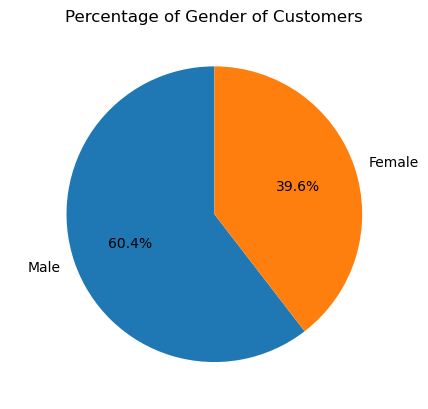

In [2]:
df['Gender'].value_counts().plot(kind="pie",autopct='%1.1f%%',labels=["Male", "Female"],startangle=90)
plt.ylabel(' ')
plt.title('Percentage of Gender of Customers')

count    2000.000000
mean       40.823500
std         9.455848
min        20.000000
25%        33.000000
50%        40.000000
75%        48.000000
max        76.000000
Name: Age, dtype: float64

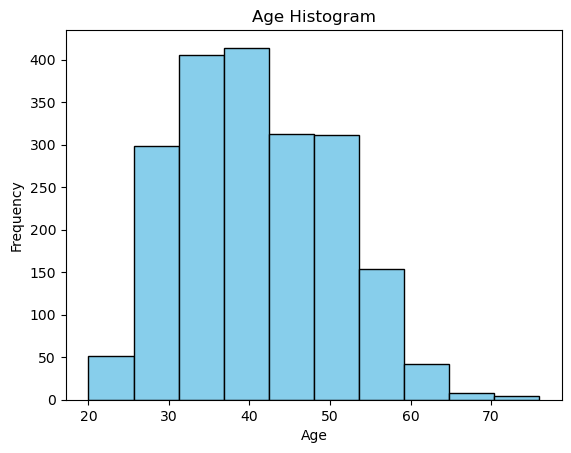

In [3]:
plt.hist(df['Age'],color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Histogram')
df['Age'].describe()

Text(0.5, 1.0, 'Percentage of Level of Education of Customers')

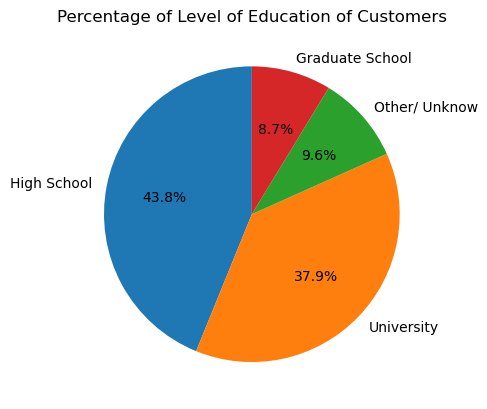

In [4]:
df['Education'].value_counts().plot(kind="pie",autopct='%1.1f%%',labels=["High School","University","Other/ Unknow","Graduate School"],startangle=90)
plt.ylabel(' ')
plt.title('Percentage of Level of Education of Customers')

count      2000.000000
mean     137516.196500
std       46184.296588
min       35832.000000
25%      101262.750000
50%      133004.000000
75%      171232.500000
max      309364.000000
Name: Income, dtype: float64

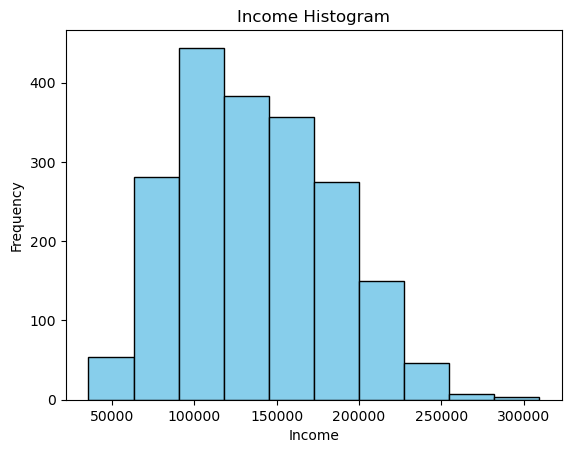

In [5]:
plt.hist(df['Income'],color='skyblue', edgecolor='black')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Income Histogram')
df['Income'].describe()

Text(0.5, 1.0, 'Percentage of each Occupation')

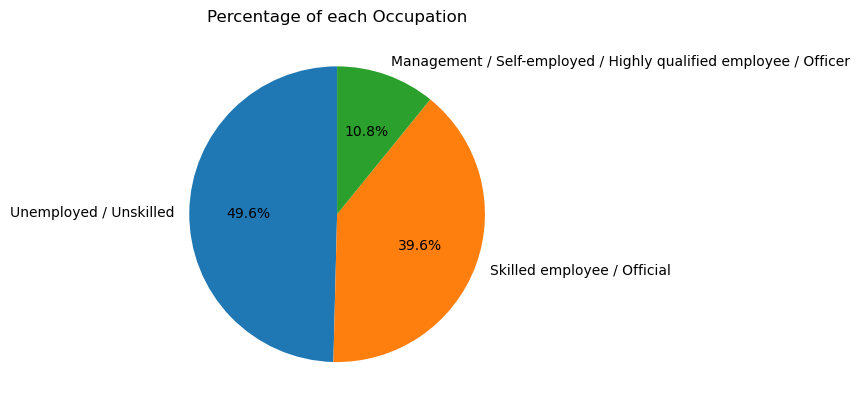

In [6]:
df['Occupation'].value_counts().plot(kind="pie",autopct='%1.1f%%',labels=["Unemployed / Unskilled","Skilled employee / Official","Management / Self-employed / Highly qualified employee / Officer"],startangle=90)
plt.ylabel(' ')
plt.title('Percentage of each Occupation')

Text(0.5, 1.0, 'Percentage of each Settlement Size')

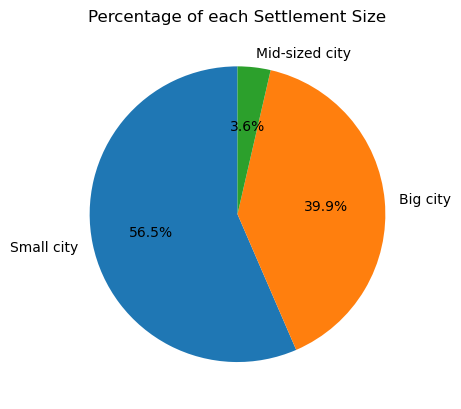

In [7]:
df['Settlement Size'].value_counts().plot(kind="pie",autopct='%1.1f%%',labels=["Small city","Big city","Mid-sized city"],startangle=90)
plt.ylabel(' ')
plt.title('Percentage of each Settlement Size')

Text(0.5, 1.0, 'Percentage of Gender of Customers')

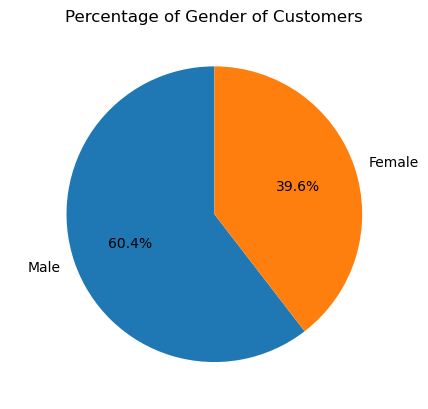

In [8]:
df['Gender'].value_counts().plot(kind="pie",autopct='%1.1f%%',labels=["Male","Female"],startangle=90)
plt.ylabel(' ')
plt.title('Percentage of Gender of Customers')

In [9]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=2)

,Gender,Marital Status,Age,Education,Income,Occupation,Settlement Size
Gender,1.00,0.52,0.39,0.43,0.39,0.46,0.41
Marital Status,0.52,1.00,0.73,0.83,0.73,0.90,0.79
Age,0.39,0.73,1.00,0.61,1.00,0.66,0.59
Education,0.43,0.83,0.61,1.00,0.61,0.75,0.65
Income,0.39,0.73,1.00,0.61,1.00,0.66,0.59
Occupation,0.46,0.90,0.66,0.75,0.66,1.00,0.72
Settlement Size,0.41,0.79,0.59,0.65,0.59,0.72,1.00


In [10]:
from sklearn.preprocessing import StandardScaler
np.set_printoptions(precision=3, suppress = True)
sc = StandardScaler()

df_scaled['Age'] = sc.fit_transform(df_scaled[['Age']])
df_scaled['Income'] = sc.fit_transform(df_scaled[['Income']])

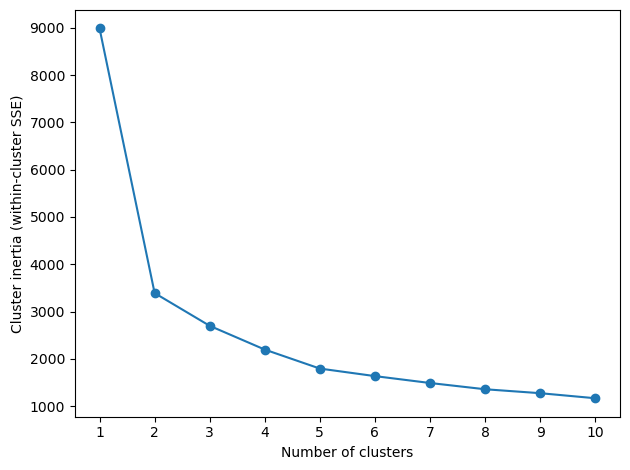

In [11]:
inertias = [] 
from sklearn.cluster import KMeans

for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(df_scaled)
    inertias.append(km.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Cluster inertia (within-cluster SSE)')
plt.xticks(range(1,11))
plt.tight_layout()
plt.show()

silhouette_avg: 0.54


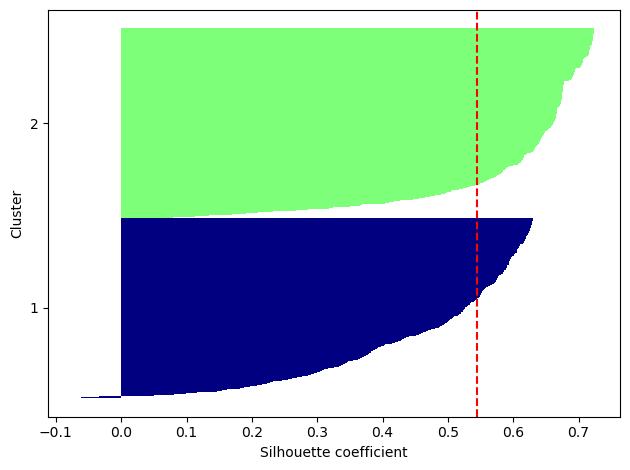

In [12]:
from matplotlib import cm

from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters=2,  
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(df_scaled)

cluster_labels = np.unique(y_km)

n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(df_scaled, y_km, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
    
silhouette_avg = np.mean(silhouette_vals)
print(f'silhouette_avg: {silhouette_avg:.2f}')

plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

silhouette_avg: 0.43


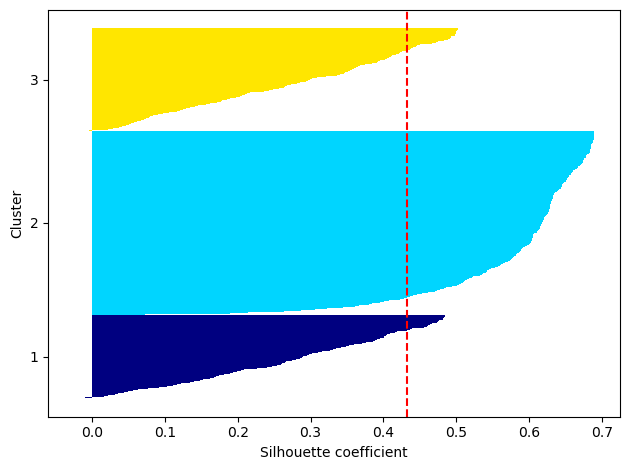

In [13]:
from matplotlib import cm

from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters=3,  
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(df_scaled)

cluster_labels = np.unique(y_km)

n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(df_scaled, y_km, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
    
silhouette_avg = np.mean(silhouette_vals)
print(f'silhouette_avg: {silhouette_avg:.2f}')

plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

silhouette_avg: 0.45


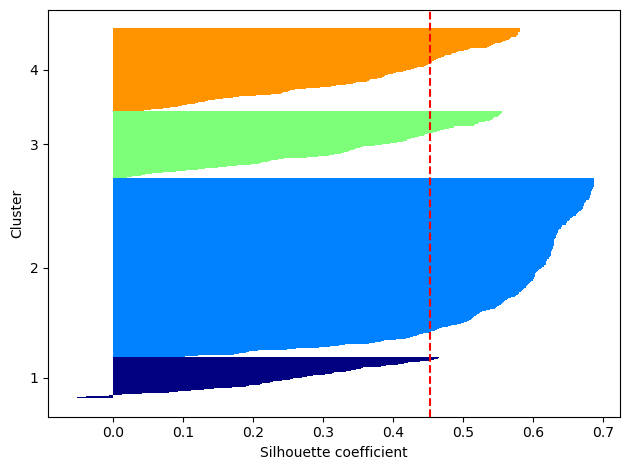

In [14]:
from matplotlib import cm

from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters=4,  
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(df_scaled)

cluster_labels = np.unique(y_km)

n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(df_scaled, y_km, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
    
silhouette_avg = np.mean(silhouette_vals)
print(f'silhouette_avg: {silhouette_avg:.2f}')

plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

In [15]:
km_plus = KMeans(n_clusters=2, 
            init='k-means++',  
            n_init=10,      
            max_iter=300,   
            random_state=0)

y_km_plus = km_plus.fit_predict(df_scaled)

print(y_km_plus)
print(f'\nClusters:\n {km_plus.cluster_centers_}')

[0 1 1 ... 0 1 0]

Clusters:
 [[ 0.856  0.993  0.778  2.104  0.778  1.215  1.637]
 [ 0.365  0.032 -0.74   0.841 -0.74   0.039  0.07 ]]


In [16]:
df['kmeancluster'] = y_km_plus.tolist()
km_df_0 = df[df['kmeancluster'] == 0]
km_df_1 =  df[df['kmeancluster'] == 1] 

In [17]:
df['kmeancluster'].value_counts()

kmeancluster
1    1024
0     976
Name: count, dtype: int64

In [18]:
print(km_df_0.mean())

Gender                  0.855533
Marital Status          0.991803
Age                    48.178279
Education               2.102459
Income             173460.689549
Occupation              1.214139
Settlement Size         1.635246
kmeancluster            0.000000
dtype: float64


In [19]:
km_df_0.mode()

,Gender,Marital Status,Age,Education,Income,Occupation,Settlement Size,kmeancluster
0,1.0,1.0,48.0,2.0,155228,1.0,2.0,0.0
1,NaN,NaN,NaN,NaN,167851,NaN,NaN,NaN


In [20]:
km_df_1.mode()

,Gender,Marital Status,Age,Education,Income,Occupation,Settlement Size,kmeancluster
0,0.0,0.0,33.0,1.0,74476,0.0,0.0,1.0
1,NaN,NaN,NaN,NaN,80530,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,102880,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,107813,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,111186,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,119959,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,164456,NaN,NaN,NaN


In [21]:
print(km_df_1.mean())

Gender                  0.365234
Marital Status          0.032227
Age                    33.813477
Education               0.840820
Income             103256.601562
Occupation              0.039062
Settlement Size         0.070312
kmeancluster            1.000000
dtype: float64


In [22]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=2, 
                             metric='euclidean', 
                             linkage='complete')
labels = ac.fit_predict(df_scaled)

cluster_labels = ac.labels_
cluster_labels

print('Cluster labels: %s' % labels)
ac_centers = labels.mean()
print(ac_centers)

Cluster labels: [0 1 1 ... 0 1 0]
0.4185


In [23]:
df['agglo'] = cluster_labels.tolist()

agglo_df_0 =  df[df['agglo'] == 0] 
agglo_df_1 =  df[df['agglo'] == 1] 

In [24]:
df['agglo'].value_counts()

agglo
0    1163
1     837
Name: count, dtype: int64

In [25]:
agglo_df_0.mode()

,Gender,Marital Status,Age,Education,Income,Occupation,Settlement Size,kmeancluster,agglo
0,1.0,1.0,43.0,2.0,128688,1.0,2.0,0.0,0.0
1,NaN,NaN,NaN,NaN,155228,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,164456,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,166432,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,167851,NaN,NaN,NaN,NaN


In [26]:
print(agglo_df_0.mean())

Gender                  0.774721
Marital Status          0.856406
Age                    47.080825
Education               1.925193
Income             168085.081685
Occupation              1.043852
Settlement Size         1.384351
kmeancluster            0.160791
agglo                   0.000000
dtype: float64


In [27]:
agglo_df_1.mode()

,Gender,Marital Status,Age,Education,Income,Occupation,Settlement Size,kmeancluster,agglo
0,0.0,0.0,33.0,1.0,74476,0.0,0.0,1.0,1.0
1,NaN,NaN,NaN,NaN,80530,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,102880,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,111186,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,119959,NaN,NaN,NaN,NaN


In [28]:
print(agglo_df_1.mean())

Gender                 0.367981
Marital Status         0.005974
Age                   32.129032
Education              0.805257
Income             95041.150538
Occupation             0.013142
Settlement Size        0.069295
kmeancluster           1.000000
agglo                  1.000000
dtype: float64


In [34]:
agglo_df_0['difference'] = agglo_df_0['kmeancluster']-agglo_df_0['agglo']
agglo_df_0['difference'].value_counts()

C:\Users\khuon\AppData\Local\Temp\ipykernel_23340\3426328266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agglo_df_0['difference'] = agglo_df_0['kmeancluster']-agglo_df_0['agglo']


difference
0    976
1    187
Name: count, dtype: int64

In [30]:
#Compare the customer segments identified by the two techniques. Do any clusters overlap?
agglo_df_1['difference'] = agglo_df_1['kmeancluster']-agglo_df_1['agglo']
agglo_df_1['difference'].value_counts()

C:\Users\khuon\AppData\Local\Temp\ipykernel_23340\1849872412.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agglo_df_1['difference'] = agglo_df_1['kmeancluster']-agglo_df_1['agglo']


difference
0    837
Name: count, dtype: int64

## Assignment Submission   
You will need to submit two files:   

1. A PDF document containing your report for company management submission. Ensure it's comprehensive, including all relevant tables and graphs generated from the Jupyter notebook that you also submit. I suggest drafting the report in Word and then converting it to PDF for submission.
2. Your Jupyter Notebook containing the Python code used in your analysis. Ensure that your code is well-organized, easy to understand, and capable of generating all the outputs included in the report (will be used to verify your analysis presented in the submitted report).

## Marking Criteria

- To receive full marks your solutions must satisfy the following criteria:
    - Provide numerically correct answers;
    - Use Python methods and libraries covered in lectures;
    - Do not include irrelevant material in the report (that you do not discuss);
    - When including tables and charts label them properly;
    - Each included table and chart you include in the report needs to be discussed in text;
    - The report is to be read by marketing managers who may not have the expertise to understand technical terms; 
        - It should be written in clear and easy to understand sentences.
    - Report must contain the word count
    - See Marking Rubric file for details
